In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




user_purchase = pd.read_csv("TravelData.csv") 
user_detail = pd.read_csv("TravelDataDemos.csv")

In [2]:
# Data containing user purchase detail.
user_purchase.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel
0,9558,1,2016-03-12 22:18:34,5.786,MOBILE,7,0,0,0,0
1,9558,1,2016-03-13 05:25:49,65.725,MOBILE,7,0,0,0,0
2,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,0,0,0,0
3,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,0,0,0,0
4,1,3,2015-08-07 19:16:59,120.000,FIXED,7,0,0,0,17


In [3]:
user_detail.head()

,UserID,SPSS_Regio5,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,9558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5.0,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
3,2,3.0,3.0,2.0,2.0,47.0,2.0,7.0,0.0,2.0,6.0,4.0
4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Renaming columns of user detail dataset
user_detail.rename({"SPSS_Regio5":"Region","RESP_GEM_GROOTTE":"Muni_size","BAS_huishoudgrootte":"Household_size","BAS_werkzaamheid_resp":"Work_kind","BAS_bruto_jaarinkomen":"Annual_Income","afg_kinderen_huishouden":"No_Of_Children","AFG_sk2015":"Social_Class","BAS_voltooide_opleiding8_resp":"Education","SPSS_Lifestage":"Age_Cat"},axis=1,inplace=True)

In [5]:
# Merging both the datasets

user = pd.merge(user_purchase,user_detail,on = "UserID")


In [ ]:
# Dropping unwanted columns
#user = user.drop("SPSS_Lifestage",axis =1)

In [6]:
# This is the final dataset on which we need to work
user.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,...,Muni_size,Household_size,GenderID,Age,Work_kind,Annual_Income,No_Of_Children,Social_Class,Education,Age_Cat
0,9558,1,2016-03-12 22:18:34,5.786,MOBILE,7,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9558,1,2016-03-13 05:25:49,65.725,MOBILE,7,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,2015-08-07 19:16:59,120.000,FIXED,7,0,0,0,17,...,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0


In [7]:
# Info about the dataset
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456414 entries, 0 to 2456413
Data columns (total 21 columns):
UserID            int64
PurchaseID        int64
TIMESPSS          object
Duration          float64
DEVICE_TYPE       object
type_touch        int64
purchase_own      int64
purchase_any      int64
MobilePanel       int64
FixedPanel        int64
Region            float64
Muni_size         float64
Household_size    float64
GenderID          float64
Age               float64
Work_kind         float64
Annual_Income     float64
No_Of_Children    float64
Social_Class      float64
Education         float64
Age_Cat           float64
dtypes: float64(12), int64(7), object(2)
memory usage: 412.3+ MB


In [8]:
# Adding a new column which consists of Hour_Of_Day at which the purchase happened
user["Hour_Of_Day"] = user["TIMESPSS"].str.split(" ").str[1].str.split(":").str[0]

In [9]:
# Adding few more derived columns from the existing date column in the final user dataset.
user["TIMESPSS"] = pd.to_datetime(user["TIMESPSS"])
user["Year"] = user["TIMESPSS"].dt.year
user["Month"] = user["TIMESPSS"].dt.month
user["Day"] = user["TIMESPSS"].dt.day

In [10]:
# time_spent
user["Time_Spent"] =user["Duration"].fillna(method='bfill')

In [ ]:
# Dropping Duration from the original dataset

#user=user.drop("Duration",axis =1)

In [ ]:
# Imputing data for time_spent 

#user["Time_Spent"].interpolate(inplace = True)

In [11]:
# Imputing data for Region columns in the dataset

user["Region"]=user["Region"].fillna(method="bfill")
user["Work_kind"]=user["Work_kind"].fillna(method="bfill")


In [12]:
# Checking the null values in each variable
user.isnull().sum()/len(user)*100

UserID             0.000000
PurchaseID         0.000000
TIMESPSS           0.000000
Duration           5.742721
DEVICE_TYPE        0.000000
type_touch         0.000000
purchase_own       0.000000
purchase_any       0.000000
MobilePanel        0.000000
FixedPanel         0.000000
Region             0.000000
Muni_size         12.413583
Household_size    12.413583
GenderID          12.413583
Age               12.413583
Work_kind          0.000000
Annual_Income     12.413583
No_Of_Children    12.413583
Social_Class      12.413583
Education         15.319812
Age_Cat           12.413583
Hour_Of_Day        0.000000
Year               0.000000
Month              0.000000
Day                0.000000
Time_Spent         0.000000
dtype: float64

In [13]:
# data for descriptive analysis:

desc_data = user[["UserID","PurchaseID","Month","Day","Time_Spent","DEVICE_TYPE","type_touch","purchase_own","purchase_any",'Work_kind',"Social_Class","Hour_Of_Day","Region","Age_Cat"]]
desc_data.head()

,UserID,PurchaseID,Month,Day,Time_Spent,DEVICE_TYPE,type_touch,purchase_own,purchase_any,Work_kind,Social_Class,Hour_Of_Day,Region,Age_Cat
0,9558,1,3,12,5.786,MOBILE,7,0,0,2.0,NaN,22,5.0,NaN
1,9558,1,3,13,65.725,MOBILE,7,0,0,2.0,NaN,05,5.0,NaN
2,9558,1,3,13,6.492,MOBILE,7,0,0,2.0,NaN,12,5.0,NaN
3,9657,2,7,18,57.000,FIXED,4,0,0,2.0,NaN,13,5.0,NaN
4,1,3,8,7,120.000,FIXED,7,0,0,2.0,5.0,19,5.0,2.0


In [14]:
# imputing values in the Region column
desc_data["Social_Class"] = desc_data["Social_Class"].fillna(method="bfill")

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
# imputing values in the Age_Cat column
desc_data["Age_Cat"] = desc_data["Age_Cat"].fillna(method="bfill")

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
# null values in the desc_data
desc_data.isnull().sum()/len(desc_data)*100

UserID          0.0
PurchaseID      0.0
Month           0.0
Day             0.0
Time_Spent      0.0
DEVICE_TYPE     0.0
type_touch      0.0
purchase_own    0.0
purchase_any    0.0
Work_kind       0.0
Social_Class    0.0
Hour_Of_Day     0.0
Region          0.0
Age_Cat         0.0
dtype: float64

In [17]:
desc_data.head()

,UserID,PurchaseID,Month,Day,Time_Spent,DEVICE_TYPE,type_touch,purchase_own,purchase_any,Work_kind,Social_Class,Hour_Of_Day,Region,Age_Cat
0,9558,1,3,12,5.786,MOBILE,7,0,0,2.0,5.0,22,5.0,2.0
1,9558,1,3,13,65.725,MOBILE,7,0,0,2.0,5.0,05,5.0,2.0
2,9558,1,3,13,6.492,MOBILE,7,0,0,2.0,5.0,12,5.0,2.0
3,9657,2,7,18,57.000,FIXED,4,0,0,2.0,5.0,13,5.0,2.0
4,1,3,8,7,120.000,FIXED,7,0,0,2.0,5.0,19,5.0,2.0


In [18]:
# Categorising data into CIC and FIC


desc_data["Touchpoint_cat"] = pd.cut(desc_data["type_touch"],bins=[0,16,22],labels=["CIC","FIC"],right=True)
desc_data["Touchpoint_cat"].head()
        


C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    CIC
1    CIC
2    CIC
3    CIC
4    CIC
Name: Touchpoint_cat, dtype: category
Categories (2, object): [CIC < FIC]

In [19]:
desc_data.head()

,UserID,PurchaseID,Month,Day,Time_Spent,DEVICE_TYPE,type_touch,purchase_own,purchase_any,Work_kind,Social_Class,Hour_Of_Day,Region,Age_Cat,Touchpoint_cat
0,9558,1,3,12,5.786,MOBILE,7,0,0,2.0,5.0,22,5.0,2.0,CIC
1,9558,1,3,13,65.725,MOBILE,7,0,0,2.0,5.0,05,5.0,2.0,CIC
2,9558,1,3,13,6.492,MOBILE,7,0,0,2.0,5.0,12,5.0,2.0,CIC
3,9657,2,7,18,57.000,FIXED,4,0,0,2.0,5.0,13,5.0,2.0,CIC
4,1,3,8,7,120.000,FIXED,7,0,0,2.0,5.0,19,5.0,2.0,CIC


In [20]:
desc_data.isnull().sum()

UserID            0
PurchaseID        0
Month             0
Day               0
Time_Spent        0
DEVICE_TYPE       0
type_touch        0
purchase_own      0
purchase_any      0
Work_kind         0
Social_Class      0
Hour_Of_Day       0
Region            0
Age_Cat           0
Touchpoint_cat    0
dtype: int64

In [21]:
import seaborn as sns
touch_point_conversion=desc_data[desc_data["purchase_any"]==1].pivot_table(index=["PurchaseID","Touchpoint_cat"],values="purchase_any",aggfunc=np.size).reset_index()
touch_point_conversion.head()

,PurchaseID,Touchpoint_cat,purchase_any
0,12,CIC,14
1,14,CIC,104
2,29,CIC,149
3,37,CIC,187
4,53,CIC,9


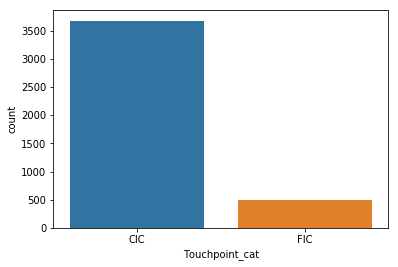

In [22]:
#Q1 What is the effect of CICs on booking conversions?

sns.countplot(touch_point_conversion["Touchpoint_cat"])

In [23]:
#Q2 Which are the consumer segments who engage in CICs and convert?

x=desc_data[(desc_data["purchase_any"]==1) & (desc_data["Touchpoint_cat"]=="CIC")].pivot_table(index=["Age_Cat","Touchpoint_cat"],values="purchase_any",aggfunc=np.size).reset_index()


([<matplotlib.axis.XTick at 0x2cd0a7a7a20>,
 <a list of 9 Text xticklabel objects>)

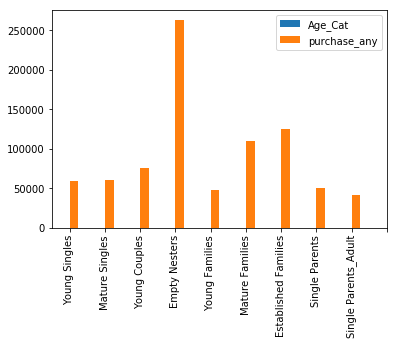

In [24]:
x.plot(kind="bar")
#plt.legend(("Young Singles","Mature Singles","Young Couples","Empty Nesters","Young Families","Mature Families","Established Families","Single Parents","Single Parents_Adult","Unknown"))
plt.xticks(ticks=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0], 
labels=["Young Singles","Mature Singles","Young Couples","Empty Nesters","Young Families","Mature Families",
        "Established Families","Single Parents","Single Parents_Adult"])


In [ ]:
# Q3 Can a firm-initiated contact make customers who have engaged in customer-initiated contacts with competitors, make them shift consideration?

In [25]:
desc_data.shape

(2456414, 15)

In [26]:
desc_data.to_excel('Final_data.xlsx')